In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm as tqdm

### 导入数据

In [2]:
data = pd.read_csv('data1.csv',encoding='utf-8')
data.head()

platform_open_id  goods_num   price  \
0  101ZX1xyfG/omvnxQPYI8YPFhoi2hfl26RoAPgzb9VqwG0=          1  3650.0   
1  爱012Pr5yntLUcTKU0MtsjPGOs2DEMds1FAQI7fgfrP3PMg=          1  2690.0   
2  朱01i4Rmip4x6V5VS/UZPBzc+Nnn6lnZ7cacExIx+8aylCY=          1  3990.0   
3  001bRbDk61o6cYW1XuaH8XgLgKHM0CMIQafAKaTQc17qGM=          1  3290.0   
4  t014Au7WHWPPI0OeT5DX13SQ5q8qGekDqre2uZnHtcQpY8=          1  3590.0   

   is_member  discount_fee   outer_id              take_at  status  payment  \
0          0         300.0  302945-01  2020-01-01 01:35:43       6   3350.0   
1          0         600.0  227605-01  2020-01-01 08:55:17       6   2090.0   
2          1         400.0  226403-01  2020-01-01 09:48:35       6   3590.0   
3          0           0.0        NaN  2020-01-01 09:56:04       6   3290.0   
4          1         500.0  282846-01  2020-01-01 10:36:50       6   3090.0   

   member_id  order_payment  total_fee      goods_id  
0          0         3350.0     3350.0  520399672992  
1          0         2090.0     2090.0  548452717637  
2     616297         3590.0     3590.0  564779472639  
3          0         3290.0     3290.0  609664493135  
4     220404         3090.0     3090.0  589083659427

### 简单分析

In [3]:
# 看店铺复购次数（问题1：时间顺序错误（统计货物复购同样有类似情况））
data_platform_id = data.groupby('platform_open_id')
list(data_platform_id)[0][1]

platform_open_id  goods_num    price  \
201412   -01CXQpmEM5354W1E9Y5jysHWdHwSigfMMQPj0dkBAC8Vk=          1     0.01   
325621   -01CXQpmEM5354W1E9Y5jysHWdHwSigfMMQPj0dkBAC8Vk=          1  2990.00   
895612   -01CXQpmEM5354W1E9Y5jysHWdHwSigfMMQPj0dkBAC8Vk=          1  3890.00   
1810979  -01CXQpmEM5354W1E9Y5jysHWdHwSigfMMQPj0dkBAC8Vk=          1  6490.00   

         is_member  discount_fee   outer_id              take_at  status  \
201412           1           0.0         定金  2020-05-31 22:32:42       6   
325621           1           0.0  323219-01  2020-03-05 00:00:50       6   
895612           1           0.0  249022-01  2021-04-09 23:39:08     101   
1810979          1           0.0  292648-01  2020-06-01 01:20:35     101   

         payment  member_id  order_payment  total_fee      goods_id  
201412      0.01     292636           0.01       0.01  593426803862  
325621   2990.00     292636        2990.00    2990.00  597332751479  
895612      0.00     292636        3890.00    3890.00  521901230870  
1810979     0.00     292636        6490.00    6490.00  601766334473

### 测试计算两个日期之间的天数

In [4]:
import datetime
def minNums(startTime, endTime):
    '''计算两个时间点之间的分钟数'''
    # 计算分钟数
    startTime2 = datetime.datetime.strptime(startTime, "%Y-%m-%d %H:%M:%S")
    endTime2 = datetime.datetime.strptime(endTime, "%Y-%m-%d %H:%M:%S")
#     seconds = (endTime2 - startTime2).seconds
    # 来获取时间差中的秒数。注意，seconds获得的秒只是时间差中的小时、分钟和秒部分的和，并没有包含时间差的天数（既是两个时间点不是同一天，失效）
    total_seconds = (endTime2 - startTime2).total_seconds()
    # 来获取准确的时间差，并将时间差转换为分
    mins = total_seconds / 60
    return int(mins)
def min_day(startTime, endTime):
    '''计算两个时间点之间的分钟数'''
    # 计算分钟数
    startTime2 = datetime.datetime.strptime(startTime, "%Y-%m-%d")
    endTime2 = datetime.datetime.strptime(endTime, "%Y-%m-%d")
    days = (endTime2 - startTime2).days
    return int(days)

startTime_1 = '2019-07-28 00:00:00'
endTime_1 = '2019-07-29 00:00:00'
min_ = minNums(startTime_1, endTime_1)
print(f'----时间差为：{min_}分钟-------------')

startTime_2 = '2020-01-01'
endTime_2 = '2021-06-30'
day_ = min_day(startTime_2, endTime_2)
print(f'----时间差为：{day_}天-------------')

----时间差为：1440分钟-------------
----时间差为：546天-------------


### 可视化函数定义

C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:77: MatplotlibDeprecationWarning: Unrecognized location 'String or Number'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


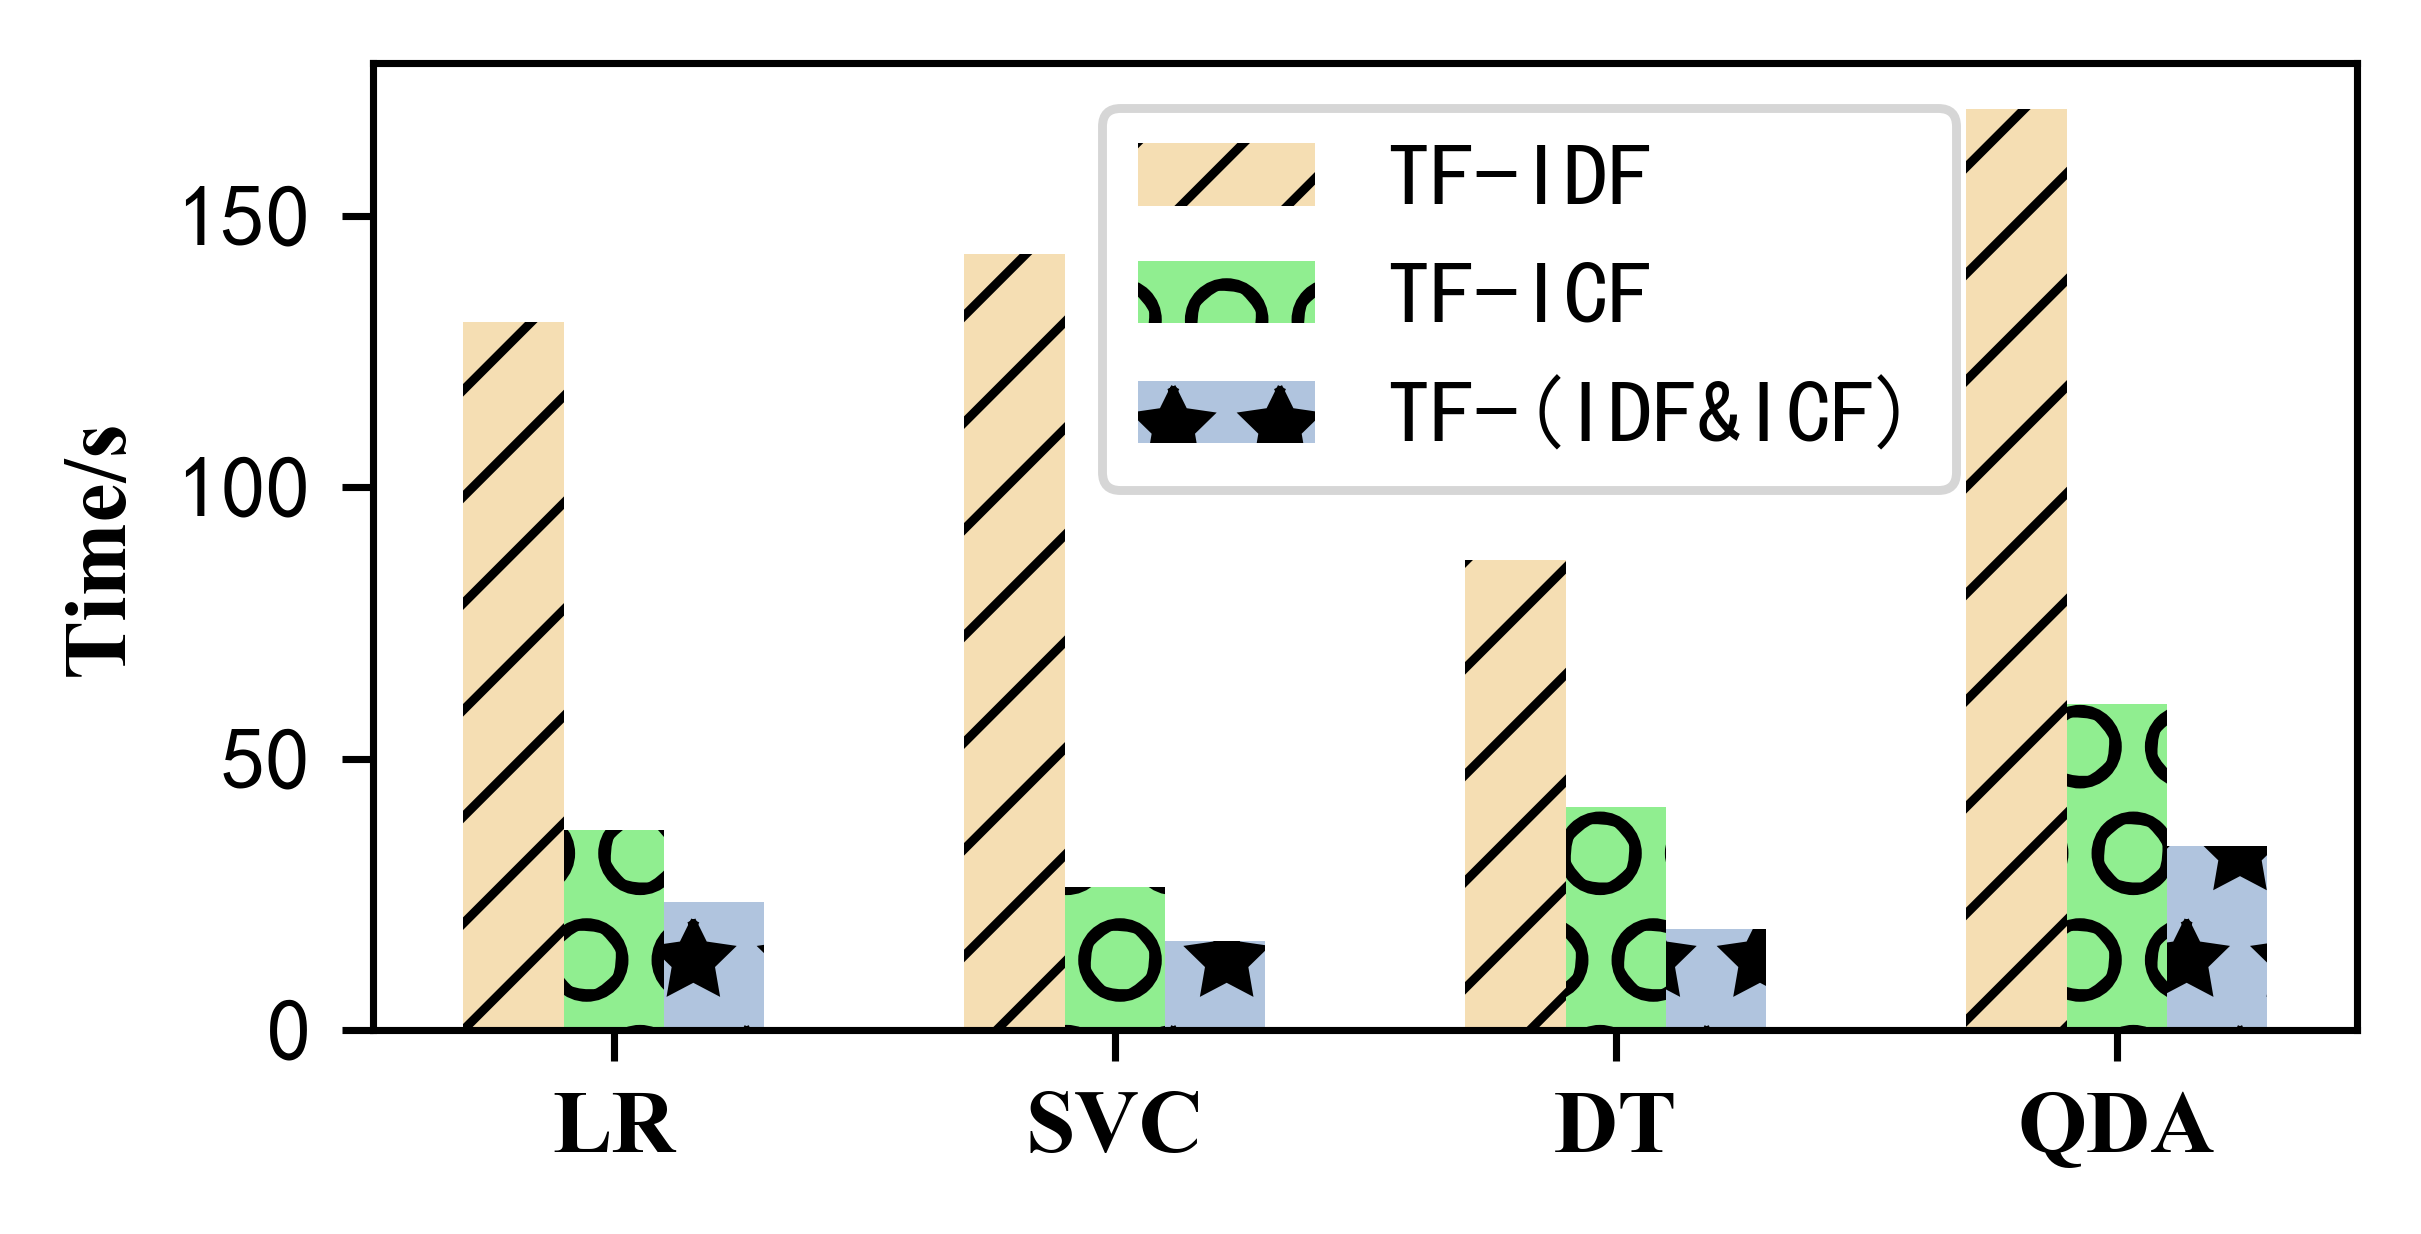

In [40]:
# 画图
from pyecharts.charts import Bar
from pyecharts import options as opts
# 导入输出图片工具
from pyecharts.render import make_snapshot
# 使用snapshot-selenium 渲染图片
from snapshot_selenium import snapshot

month_list=pd.period_range('2020-01-01', periods=547, freq='D')
month_list = [str(month_list[i]) for i in range(len(month_list))]

def line_charts1(data1,data2,data3,data_x,x_name,y_name,title) -> Bar:
    line = (
        Bar()
        .add_xaxis(data_x)
        .add_yaxis(
            "TF-IDF",
            data1
        )
        .add_yaxis(
            "TF-ICF",
            data2
        )
        .add_yaxis(
            "TF-(IDF&ICF)",
            data3
        )
        .set_global_opts(title_opts=opts.TitleOpts(title=title)
                         ,yaxis_opts=opts.AxisOpts(name=y_name)
                         ,xaxis_opts=opts.AxisOpts(name=x_name),)
         .set_series_opts(
            label_opts=opts.LabelOpts(is_show=False), # 是否显示标签
        )
    )
    return line

y_1 = [130.5,143,86.6,169.7]
y_2 = [36.8,26.4,41.1,60.1]
y_3 = [23.5,16.3,18.6,33.8]
x = ['LR','SVC','DT','QDA']

line_day = line_charts1(y_1,y_2,y_3,x,x_name='Model',y_name='time/s',title='Comparison of result')
line_day.render("sale_day分析.html")


import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
 
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False





plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

x_14 = list(range(4))
x_15 = [i+0.2 for i in x_14]
x_16 = [i+0.4 for i in x_14]

# 设置图形大小
plt.figure(figsize=(4,2),dpi=640)

plt.bar(range(4),y_1,width=0.2,label="TF-IDF", hatch="//", color= 'wheat')
plt.bar(x_15,y_2,width=0.2,label="TF-ICF", hatch="O", color='lightgreen')
plt.bar(x_16,y_3,width=0.2,label="TF-(IDF&ICF)", hatch="*", color='lightsteelblue')

# 设置x轴的刻度
plt.xticks(x_15,x,fontproperties = 'Times New Roman')

legend_prop = {'weight':'bold'}
plt.legend(prop=legend_prop,fontsize='x-small')

plt.legend(loc='String or Number', bbox_to_anchor=(0.345,1))
plt.ylabel("Time/s",fontdict={'family' : 'Times New Roman'})
# 设置图例


plt.savefig('a.png',dpi=1080, bbox_inches='tight')
# 展示
plt.show()




### 得到最后进行统计的数据

In [6]:
# 提取时间戳“take_at”有用信息 这里的'int_date'用于根据购买时间进行排序，因为上面可以看出时间顺序有错误
date1 = data['take_at'].str.split(' ').str[0]
date2 = data['take_at'].str.split(' ').str[1]
data['year-month-day']=date1
time_1 = date1.str.split('-').str[0]+date1.str.split('-').str[1]+date1.str.split('-').str[2]
time_1_1 = date1.str.split('-').str[0]+date1.str.split('-').str[1]
data['year-month']=time_1_1
time_2 = date2.str.split(':').str[0]+date2.str.split(':').str[1]+date2.str.split(':').str[2]
print(time_1 + time_2)
data['int_date'] = time_1 + time_2

0          20200101013543
1          20200101085517
2          20200101094835
3          20200101095604
4          20200101103650
                ...      
2076751    20210629204434
2076752    20210629222033
2076753    20210630141208
2076754    20210630195736
2076755    20210630222549
Name: take_at, Length: 2076756, dtype: object


In [7]:
# 得到最后的要统计的数据（取需要的列，将int_date转换成int类型，便于根据时间排序，解决上述问题1）
data_last = data[['platform_open_id','status','year-month','year-month-day','take_at','int_date','goods_id','payment']]
# 关闭 SettingWithCopy警告，解决可以通过（.copy()）
pd.set_option('mode.chained_assignment', None)
data_last["int_date"] = pd.to_numeric(data_last["int_date"])
data_last.sort_values("int_date",inplace=True)
# 只取状态6，也就是交易成功，不考虑退款情况的
data_last=data_last[data_last['status']==6]
data_last = data_last.drop(data_last[(data_last['payment']<200)].index)
data_last = data_last[['platform_open_id','year-month','year-month-day','take_at','int_date','goods_id','payment']]
data_last.head(-5)

platform_open_id year-month  \
2035784  j01K6alWEytFsvY9L/hXP2pVdnn6lnZ7cacExIx+8aylCY=     202001   
990778   y01GA3Jyiu6eb8M1+n3QZdvOJq8qGekDqre2uZnHtcQpY8=     202001   
553994   午01g9mL1+rVa7jkz9IzW7yvKtnn6lnZ7cacExIx+8aylCY=     202001   
1312762  g01+KjcO94fxyzIrht30ht/S5q8qGekDqre2uZnHtcQpY8=     202001   
1757095  p01Lb205bwPvDahJSyD878h2816em85Fa0GBxDkCy7kcI8=     202001   
...                                                  ...        ...   
397534   e01AZmELsasFoOmMRktN/JeDRoi2hfl26RoAPgzb9VqwG0=     202106   
1881173  大01CE6f8gIpC4l9OI3WSeoWehoi2hfl26RoAPgzb9VqwG0=     202106   
2025522  爱010sxHc9HYJTmEEIB29lzf/gKHM0CMIQafAKaTQc17qGM=     202106   
1788251  进01LIm+mEYbZ5466x/eur4fPGdHwSigfMMQPj0dkBAC8Vk=     202106   
1498481  s016SENPxnXKU4kNTHHVHnENQKHM0CMIQafAKaTQc17qGM=     202106   

        year-month-day              take_at        int_date      goods_id  \
2035784     2020-01-01  2020-01-01 00:00:14  20200101000014  536027498869   
990778      2020-01-01  2020-01-01 00:00:58  20200101000058  589083659427   
553994      2020-01-01  2020-01-01 00:01:04  20200101000104  548452717637   
1312762     2020-01-01  2020-01-01 00:01:41  20200101000141  548452717637   
1757095     2020-01-01  2020-01-01 00:03:14  20200101000314  564779472639   
...                ...                  ...             ...           ...   
397534      2021-06-30  2021-06-30 22:25:41  20210630222541  537061935969   
1881173     2021-06-30  2021-06-30 22:33:36  20210630223336  521901230870   
2025522     2021-06-30  2021-06-30 22:57:19  20210630225719  642774919220   
1788251     2021-06-30  2021-06-30 22:58:32  20210630225832  613937278240   
1498481     2021-06-30  2021-06-30 23:09:01  20210630230901  646472736680   

         payment  
2035784   2990.0  
990778    3090.0  
553994    2090.0  
1312762   2090.0  
1757095   3590.0  
...          ...  
397534    2990.0  
1881173   3890.0  
2025522   5490.0  
1788251   3690.0  
1498481    450.0  

[1066524 rows x 7 columns]

### 统计日成交量和月成交量，并可视化

In [8]:
# sale_day
status_day_num= data_last.groupby('year-month-day')['year-month-day'].count()
sale_day = list(status_day_num)

sale_week=[]
m,n=0,0
for i in range(len(sale_day)):
    m+=sale_day[i]
    n+=1
    if n%7==0:
        sale_week.append(m)
        n=0
        m=0  

# sale_month
status_month_num= data_last.groupby('year-month')['year-month'].count()
sale_month = list(status_month_num)
# 查看日销量，周销量，月销量标准差
print(f"gmv_day_std:{np.std(sale_day,ddof=1):.4f}----")
print(f"gmv_week_std:{np.std(sale_week,ddof=1):.4f}----")
print(f"gmv_month_std:{np.std(sale_month,ddof=1):.4f}----")

# # 日的销量图
# line_day = line_charts1(sale_day,x_name='day',y_name='sale_num',title='sale_num_day_analyse')
# line_day.render("sale_day分析.html")

# line_day = line_charts1(sale_week,x_name='week',y_name='sale_num',title='sale_num_week_analyse')
# line_day.render("sale_week分析.html")

# 月的销量图
# line_month = line_charts1(sale_month,x_name='month',y_name='sale_num',title='sale_num_month_analyse')
# line_month.render("sale_month分析.html")


gmv_day_std:4183.8576----
gmv_week_std:15278.5218----
gmv_month_std:37655.3533----


In [9]:
data_last.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066529 entries, 2035784 to 136737
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   platform_open_id  1066484 non-null  object 
 1   year-month        1066529 non-null  object 
 2   year-month-day    1066529 non-null  object 
 3   take_at           1066529 non-null  object 
 4   int_date          1066529 non-null  int64  
 5   goods_id          1066529 non-null  int64  
 6   payment           1066529 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 65.1+ MB


In [10]:
# # 获取good_id销售前几名
goods_id= data_last.groupby('goods_id')['goods_id'].count()
good_ids = dict(goods_id)
print(f'------good_ids卖的好的数目{dict(sorted(good_ids.items(), key=lambda item:item[1], reverse=True)[:5])}-----')
good_id_keys = list(dict(sorted(good_ids.items(), key=lambda item:item[1], reverse=True)).keys())

------good_ids卖的好的数目{537061935969: 142400, 564891421863: 108709, 536027498869: 102767, 548452717637: 95707, 564779472639: 68421}-----


In [11]:
# 看店铺复购次数(看时间发现问题1已解决)
data_last_platform_id = data_last.groupby('platform_open_id',as_index=False)
platform_id = []
for _,value in tqdm(data_last_platform_id):
    platform_id.append(list(value['year-month-day']))


### 开始统计某一店铺与某一商品的复购情况

In [16]:
# 所有商店复购时间
from collections import Counter

def anals_buy_platform_day(data):
    re_buy_most = []
    re_most_num = []
    re_buy_1 = 0
    re_buy_2 = 0 
    re_buy = []
    re_num1 = 0
    for value in tqdm(data):
        if len(value)>1:
            for i in range(len(value)):
                if i>=len(value)-1:
                    break
                else:
                    re_buy_day= min_day(value[i],value[i+1])
                    # 去除同一个客户多次复购中时间在同一天且相邻的情况
                    if re_buy_day>=1:
                        re_buy_1 += re_buy_day # 算众数
                        re_buy_2 += 1
                        re_buy.append(re_buy_day) # 算平均数
                        re_num1 += 1
                    else:
#                         pass
                        print(f'----复购中时间在同一天且相邻的情况-----:{value}')
            if re_buy_1 != 0:
                re_buy_most.append(re_buy_1/re_buy_2)
                re_most_num.append(re_buy_2)
            re_buy_1 = 0
            re_buy_2 = 0 
        else:
            continue
    return sum(re_buy),re_num1,re_buy_most,re_most_num
re_day,re_num1,re_buy_most,re_most_num= anals_buy_platform_day(platform_id)
res1 = Counter(re_buy_most)
res2 = Counter(re_most_num)
print(f'-----------用户层面复购总时间：{re_day}天----------------')
print(f'-----------用户层面最多的5个复购时间：{res1.most_common(5)}天----------------')
print(f'-----------用户层面复购次数统计：{res2}天----------------')
print(f'---------用户层面平均复购总时间：{re_day/(re_num1)}天----------------')

----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-05-09', '2020-05-09', '2021-03-05', '2021-03-27', '2021-05-31']
----复购中时间在同一天且相邻的情况-----:['2020-05-04', '2020-05-04', '2021-03-05']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-10-28', '2020-10-28', '2020-10-28']
----复购中时间在同一天且相邻的情况-----:['2020-10-28', '2020-10-28', '2020-10-28']
----复购中时间在同一天且相邻的情况-----:['2020-09-22', '2020-09-22']
----复购中时间在同一天且相邻的情况-----:['2020-02-24', '2020-02-24']
----复购中时间在同一天且相邻的情况-----:['2020-12-12', '2020-12-12']
----复购中时间在同一天且相邻的情况-----:['2020-03-30', '2020-06-01', '2020-06-01', '2020-08-23']
----复购中时间在同一天且相邻的情况-----:['2020-11-10', '2020-11-10', '2020-11-10']
----复购中时间在同一天且相邻的情况-----:['2020-11-10', '2020-11-10', '2020-11-10']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2021-06-08', '2021-06-08']
----复购中时间在同一天且相邻的情况-----:['2020-05-11', '2020-05-11']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-0

----复购中时间在同一天且相邻的情况-----:['2020-03-28', '2021-03-27', '2021-03-27']
----复购中时间在同一天且相邻的情况-----:['2020-11-02', '2020-11-02']
----复购中时间在同一天且相邻的情况-----:['2020-01-08', '2020-01-08', '2020-05-23', '2020-10-21', '2020-10-21', '2021-05-15']
----复购中时间在同一天且相邻的情况-----:['2020-01-08', '2020-01-08', '2020-05-23', '2020-10-21', '2020-10-21', '2021-05-15']
----复购中时间在同一天且相邻的情况-----:['2020-05-20', '2020-05-20']
----复购中时间在同一天且相邻的情况-----:['2021-06-08', '2021-06-08']
----复购中时间在同一天且相邻的情况-----:['2020-06-10', '2020-06-10']
----复购中时间在同一天且相邻的情况-----:['2020-03-13', '2020-03-13']
----复购中时间在同一天且相邻的情况-----:['2020-06-27', '2020-06-27']
----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21']
----复购中时间在同一天且相邻的情况-----:['2020-01-31', '2020-02-18', '2021-01-11', '2021-01-11', '2021-03-19']
----复购中时间在同一天且相邻的情况-----:['2020-01-04', '2020-01-04', '2020-01-04', '2020-01-04']
----复购中时间在同一天且相邻的情况-----:['2020-01-04', '2020-01-04', '2020-01-04', '2020-01-04']
----复购中时间在同一天且相邻的情况-----:['2020-01-04', '2020-01-04', '2020-01-04', '2020-

----复购中时间在同一天且相邻的情况-----:['2021-03-16', '2021-03-16']
----复购中时间在同一天且相邻的情况-----:['2021-06-08', '2021-06-08']
----复购中时间在同一天且相邻的情况-----:['2020-09-22', '2020-09-22', '2020-09-22', '2020-11-03']
----复购中时间在同一天且相邻的情况-----:['2020-09-22', '2020-09-22', '2020-09-22', '2020-11-03']
----复购中时间在同一天且相邻的情况-----:['2020-06-11', '2020-06-11']
----复购中时间在同一天且相邻的情况-----:['2020-05-05', '2020-05-05', '2020-08-31', '2020-10-29', '2020-12-21']
----复购中时间在同一天且相邻的情况-----:['2020-01-26', '2020-01-26', '2020-10-21']
----复购中时间在同一天且相邻的情况-----:['2020-11-09', '2020-11-09']
----复购中时间在同一天且相邻的情况-----:['2021-01-15', '2021-01-15']
----复购中时间在同一天且相邻的情况-----:['2020-05-10', '2020-05-10']
----复购中时间在同一天且相邻的情况-----:['2020-06-30', '2020-06-30']
----复购中时间在同一天且相邻的情况-----:['2020-04-07', '2020-04-07']
----复购中时间在同一天且相邻的情况-----:['2020-06-16', '2020-06-16']
----复购中时间在同一天且相邻的情况-----:['2021-05-30', '2021-05-30']
----复购中时间在同一天且相邻的情况-----:['2021-03-07', '2021-03-07']
----复购中时间在同一天且相邻的情况-----:['2021-06-01', '2021-06-01']
----复购中时间在同一天且相邻的情况-----

----复购中时间在同一天且相邻的情况-----:['2021-01-29', '2021-01-29']
----复购中时间在同一天且相邻的情况-----:['2020-06-04', '2020-06-04']
----复购中时间在同一天且相邻的情况-----:['2020-10-17', '2020-10-17', '2020-12-29', '2021-05-23']
----复购中时间在同一天且相邻的情况-----:['2020-05-11', '2020-05-11']
----复购中时间在同一天且相邻的情况-----:['2020-06-16', '2020-06-16']
----复购中时间在同一天且相邻的情况-----:['2021-06-10', '2021-06-10']
----复购中时间在同一天且相邻的情况-----:['2020-11-02', '2020-11-02']
----复购中时间在同一天且相邻的情况-----:['2020-11-07', '2020-11-07', '2021-06-17']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2021-03-27', '2021-03-27']
----复购中时间在同一天且相邻的情况-----:['2021-02-17', '2021-02-17']
----复购中时间在同一天且相邻的情况-----:['2020-08-03', '2020-08-03']
----复购中时间在同一天且相邻的情况-----:['2020-10-15', '2020-10-15']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-07-16', '2020-07-16', '2020-07-16', '2020-09-09', '2020-09-09']
----复购中时间在同一天且相邻的情况-----:['2020-07-16', '2020-07-16', '2020-07-16', '2020-09-09', '2020-09-09']
----复购中时间在

----复购中时间在同一天且相邻的情况-----:['2020-10-29', '2020-10-29']
----复购中时间在同一天且相邻的情况-----:['2020-02-06', '2020-02-06', '2020-08-16']
----复购中时间在同一天且相邻的情况-----:['2021-03-06', '2021-03-06']
----复购中时间在同一天且相邻的情况-----:['2021-01-24', '2021-01-24', '2021-01-24', '2021-01-24']
----复购中时间在同一天且相邻的情况-----:['2021-01-24', '2021-01-24', '2021-01-24', '2021-01-24']
----复购中时间在同一天且相邻的情况-----:['2021-01-24', '2021-01-24', '2021-01-24', '2021-01-24']
----复购中时间在同一天且相邻的情况-----:['2020-05-31', '2020-05-31']
----复购中时间在同一天且相邻的情况-----:['2020-04-03', '2020-04-03', '2021-05-15']
----复购中时间在同一天且相邻的情况-----:['2020-04-03', '2020-04-03', '2020-05-02', '2020-10-20']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-01', '2020-11-01', '2020-11-06']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-01', '2020-11-01', '2020-11-06']
----复购中时间在同一天且相邻的情况-----:['2021-06-14', '2021-06-14']
----复购中时间在同一天且相邻的情况-----:['2020-10-22', '2020-10-22']
----复购中时间在同一天且相邻的情况-----:['2021-05-24', '2021-05-24', '2021-06-22']
----复购中时间在同一天且相邻的情况-----:['2020-11

----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-01']
----复购中时间在同一天且相邻的情况-----:['2020-05-19', '2020-05-19']
----复购中时间在同一天且相邻的情况-----:['2020-06-16', '2020-06-16', '2020-06-16', '2020-10-07']
----复购中时间在同一天且相邻的情况-----:['2020-06-16', '2020-06-16', '2020-06-16', '2020-10-07']
----复购中时间在同一天且相邻的情况-----:['2020-06-20', '2020-06-20']
----复购中时间在同一天且相邻的情况-----:['2021-04-30', '2021-04-30']
----复购中时间在同一天且相邻的情况-----:['2020-08-28', '2020-08-28', '2020-12-20', '2021-04-20']
----复购中时间在同一天且相邻的情况-----:['2021-06-01', '2021-06-25', '2021-06-25', '2021-06-25']
----复购中时间在同一天且相邻的情况-----:['2021-06-01', '2021-06-25', '2021-06-25', '2021-06-25']
----复购中时间在同一天且相邻的情况-----:['2020-04-15', '2020-04-15', '2020-12-12', '2021-01-03', '2021-01-03']
----复购中时间在同一天且相邻的情况-----:['2020-04-15', '2020-04-15', '2020-12-12', '2021-01-03', '2021-01-03']
----复购中时间在同一天且相邻的情况-----:['2020-03-29', '2020-05-19', '2020-05-19', '2020-08-07']
----复购中时间在同一天且相邻的情况-----:['2020-11-09', '2020-11-09']
----复购中时间在同一天且相邻的情况-----:['2020-11-09', '2020-

----复购中时间在同一天且相邻的情况-----:['2021-06-02', '2021-06-02']
----复购中时间在同一天且相邻的情况-----:['2020-03-09', '2020-03-13', '2020-03-19', '2020-03-19']
----复购中时间在同一天且相邻的情况-----:['2020-06-18', '2020-10-26', '2020-10-26', '2021-05-17', '2021-05-17']
----复购中时间在同一天且相邻的情况-----:['2020-06-18', '2020-10-26', '2020-10-26', '2021-05-17', '2021-05-17']
----复购中时间在同一天且相邻的情况-----:['2020-03-29', '2020-03-29']
----复购中时间在同一天且相邻的情况-----:['2020-06-18', '2020-06-18']
----复购中时间在同一天且相邻的情况-----:['2020-10-16', '2020-10-16']
----复购中时间在同一天且相邻的情况-----:['2020-04-16', '2020-04-16']
----复购中时间在同一天且相邻的情况-----:['2021-01-03', '2021-01-03']
----复购中时间在同一天且相邻的情况-----:['2020-07-12', '2020-07-12', '2020-12-10']
----复购中时间在同一天且相邻的情况-----:['2020-07-08', '2020-07-08', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-01']
----复购中时间在同一天且相邻的情况-----:['2020-03-13', '2020-09-19', '2021-04-16', '2021-04-16']
----复购中时间在同一天且相邻的情况-----:['2020-12-12', '2020-12-12', '2020-12-12']
----复购中时间在同一天且相邻的情况-----:['2020-12-12', '2020-12-12', '2020-12

----复购中时间在同一天且相邻的情况-----:['2020-11-02', '2020-11-02']
----复购中时间在同一天且相邻的情况-----:['2020-03-08', '2020-03-08', '2020-08-28', '2021-05-30']
----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21']
----复购中时间在同一天且相邻的情况-----:['2020-09-05', '2020-09-05']
----复购中时间在同一天且相邻的情况-----:['2020-12-20', '2020-12-20']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-16', '2021-06-16']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-16', '2021-06-16']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-16', '2021-06-16']
----复购中时间在同一天且相邻的情况-----:['2021-06-01', '2021-06-01']
----复购中时间在同一天且相邻的情况-----:['2021-01-21', '2021-01-21']
----复购中时间在同一天且相邻的情况-----:['2020-06-24', '2020-06-24']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2021-05-25', '2021-05-25']
----复购中时间在同一天且相邻的情况-----:['2020-08-25', '2020-08-25', '2020-12-24']
----复购中时间在同一天且相邻的情况-----:['2021-03

----复购中时间在同一天且相邻的情况-----:['2020-12-10', '2020-12-10', '2020-12-10']
----复购中时间在同一天且相邻的情况-----:['2020-12-10', '2020-12-10', '2020-12-10']
----复购中时间在同一天且相邻的情况-----:['2020-08-08', '2020-08-08']
----复购中时间在同一天且相邻的情况-----:['2020-04-09', '2020-04-09', '2020-09-25']
----复购中时间在同一天且相邻的情况-----:['2020-05-05', '2020-06-19', '2020-06-19']
----复购中时间在同一天且相邻的情况-----:['2021-04-09', '2021-04-09']
----复购中时间在同一天且相邻的情况-----:['2020-06-17', '2020-06-17', '2020-08-23', '2020-10-08']
----复购中时间在同一天且相邻的情况-----:['2020-11-03', '2020-11-03']
----复购中时间在同一天且相邻的情况-----:['2020-11-08', '2020-11-08']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-01']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-07-01', '2020-07-01']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-03-19', '2020-03-19']
----复购中时间在同一天且相邻的情况-----:['2021-05-03', '2021-05-03']
----复购中时间在同一天且相邻的情况-----:['2020-03-15', '2020-03-15']
----复购中时间在同一天且相邻的情况-----:['2020-02-08', '2020-02-08'

----复购中时间在同一天且相邻的情况-----:['2021-06-03', '2021-06-03']
----复购中时间在同一天且相邻的情况-----:['2020-05-11', '2020-05-11']
----复购中时间在同一天且相邻的情况-----:['2020-06-03', '2020-06-17', '2020-06-17']
----复购中时间在同一天且相邻的情况-----:['2020-10-30', '2020-10-30']
----复购中时间在同一天且相邻的情况-----:['2020-10-29', '2020-10-29']
----复购中时间在同一天且相邻的情况-----:['2020-06-08', '2020-06-10', '2020-06-10']
----复购中时间在同一天且相邻的情况-----:['2020-03-05', '2020-06-18', '2020-06-18']
----复购中时间在同一天且相邻的情况-----:['2020-10-20', '2020-10-20', '2021-05-18']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-01']
----复购中时间在同一天且相邻的情况-----:['2021-04-22', '2021-04-22', '2021-04-22']
----复购中时间在同一天且相邻的情况-----:['2021-04-22', '2021-04-22', '2021-04-22']
----复购中时间在同一天且相邻的情况-----:['2020-12-10', '2020-12-10']
----复购中时间在同一天且相邻的情况-----:['2021-06-16', '2021-06-16']
----复购中时间在同一天且相邻的情况-----:['2020-11-15', '2020-11-15']
----复购中时间在同一天且相邻的情况-----:['2020-04-19', '2020-04-19', '2020-11-08']
----复购中时间在同一天且相邻的情况-----:['2021-06-16', '2021-06-16']
----复购中时间在同一天且相邻的情况-----:['2021-03-06'

----复购中时间在同一天且相邻的情况-----:['2020-11-10', '2020-11-10']
----复购中时间在同一天且相邻的情况-----:['2020-01-20', '2020-07-14', '2020-07-14', '2020-08-27']
----复购中时间在同一天且相邻的情况-----:['2021-06-01', '2021-06-01']
----复购中时间在同一天且相邻的情况-----:['2020-01-10', '2020-01-10']
----复购中时间在同一天且相邻的情况-----:['2020-06-07', '2020-06-07', '2021-06-09']
----复购中时间在同一天且相邻的情况-----:['2020-03-27', '2020-03-27']
----复购中时间在同一天且相邻的情况-----:['2020-01-10', '2020-01-10', '2020-06-18']
----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21']
----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21']
----复购中时间在同一天且相邻的情况-----:['2021-06-01', '2021-06-01', '2021-06-01']
----复购中时间在同一天且相邻的情况-----:['2021-06-01', '2021-06-01', '2021-06-01']
----复购中时间在同一天且相邻的情况-----:['2020-04-16', '2020-04-16', '2020-07-10', '2020-09-09']
----复购中时间在同一天且相邻的情况-----:['2021-03-06', '2021-03-06']
----复购中时间在同一天且相邻的情况-----:['2020-12-13', '2020-12-19', '2020-12-19']
----复购中时间在同一天且相邻的情况-----:['2020-10-29', '2020-10-29']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在

----复购中时间在同一天且相邻的情况-----:['2021-06-01', '2021-06-01']
----复购中时间在同一天且相邻的情况-----:['2020-01-07', '2020-01-07', '2020-06-01']
----复购中时间在同一天且相邻的情况-----:['2021-02-14', '2021-02-14']
----复购中时间在同一天且相邻的情况-----:['2020-06-18', '2020-06-18']
----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21']
----复购中时间在同一天且相邻的情况-----:['2020-10-23', '2020-10-23', '2020-11-01']
----复购中时间在同一天且相邻的情况-----:['2021-06-08', '2021-06-08']
----复购中时间在同一天且相邻的情况-----:['2021-04-09', '2021-04-09', '2021-04-09']
----复购中时间在同一天且相邻的情况-----:['2021-04-09', '2021-04-09', '2021-04-09']
----复购中时间在同一天且相邻的情况-----:['2020-03-06', '2020-05-20', '2020-06-19', '2020-06-19']
----复购中时间在同一天且相邻的情况-----:['2020-02-17', '2020-02-17', '2020-02-17', '2020-02-21', '2020-02-21']
----复购中时间在同一天且相邻的情况-----:['2020-02-17', '2020-02-17', '2020-02-17', '2020-02-21', '2020-02-21']
----复购中时间在同一天且相邻的情况-----:['2020-02-17', '2020-02-17', '2020-02-17', '2020-02-21', '2020-02-21']
----复购中时间在同一天且相邻的情况-----:['2020-02-06', '2020-02-06']
----复购中时间在同一天且相邻的情况-----:['2021-03

----复购中时间在同一天且相邻的情况-----:['2020-06-03', '2020-06-03']
----复购中时间在同一天且相邻的情况-----:['2020-03-19', '2020-03-19']
----复购中时间在同一天且相邻的情况-----:['2020-06-12', '2021-01-16', '2021-01-16']
----复购中时间在同一天且相邻的情况-----:['2020-11-12', '2020-11-12']
----复购中时间在同一天且相邻的情况-----:['2020-10-23', '2020-10-23']
----复购中时间在同一天且相邻的情况-----:['2020-08-16', '2020-08-16', '2021-01-22', '2021-04-09']
----复购中时间在同一天且相邻的情况-----:['2020-04-02', '2020-04-02', '2020-04-02', '2020-04-02', '2020-04-02']
----复购中时间在同一天且相邻的情况-----:['2020-04-02', '2020-04-02', '2020-04-02', '2020-04-02', '2020-04-02']
----复购中时间在同一天且相邻的情况-----:['2020-04-02', '2020-04-02', '2020-04-02', '2020-04-02', '2020-04-02']
----复购中时间在同一天且相邻的情况-----:['2020-04-02', '2020-04-02', '2020-04-02', '2020-04-02', '2020-04-02']
----复购中时间在同一天且相邻的情况-----:['2020-05-09', '2020-05-09']
----复购中时间在同一天且相邻的情况-----:['2020-06-16', '2020-08-30', '2020-11-09', '2020-11-10', '2020-12-25', '2020-12-25', '2020-12-25', '2021-01-18', '2021-01-18']
----复购中时间在同一天且相邻的情况-----:['2020-06-16', '202

----复购中时间在同一天且相邻的情况-----:['2020-06-01', '2020-06-01']
----复购中时间在同一天且相邻的情况-----:['2020-11-09', '2020-11-09', '2020-11-09', '2020-11-27']
----复购中时间在同一天且相邻的情况-----:['2020-11-09', '2020-11-09', '2020-11-09', '2020-11-27']
----复购中时间在同一天且相邻的情况-----:['2021-06-01', '2021-06-01']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-01', '2020-11-01', '2021-01-23']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-01', '2020-11-01', '2021-01-23']
----复购中时间在同一天且相邻的情况-----:['2021-01-24', '2021-01-24']
----复购中时间在同一天且相邻的情况-----:['2020-04-16', '2021-05-24', '2021-06-07', '2021-06-07']
----复购中时间在同一天且相邻的情况-----:['2021-03-27', '2021-03-27']
----复购中时间在同一天且相邻的情况-----:['2020-06-16', '2020-06-16']
----复购中时间在同一天且相邻的情况-----:['2020-12-28', '2020-12-28']
----复购中时间在同一天且相邻的情况-----:['2020-05-14', '2020-05-14']
----复购中时间在同一天且相邻的情况-----:['2021-06-17', '2021-06-17']
----复购中时间在同一天且相邻的情况-----:['2021-03-08', '2021-03-08']
----复购中时间在同一天且相邻的情况-----:['2021-06-16', '2021-06-16']
----复购中时间在同一天且相邻的情况-----:['2020-04-24', '2020-04-2

----复购中时间在同一天且相邻的情况-----:['2020-05-20', '2020-05-20']
----复购中时间在同一天且相邻的情况-----:['2020-06-02', '2020-06-02']
----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21']
----复购中时间在同一天且相邻的情况-----:['2021-01-22', '2021-01-22']
----复购中时间在同一天且相邻的情况-----:['2020-10-25', '2020-10-25']
----复购中时间在同一天且相邻的情况-----:['2020-04-05', '2020-04-08', '2020-09-12', '2020-09-12', '2020-12-05', '2020-12-05']
----复购中时间在同一天且相邻的情况-----:['2020-04-05', '2020-04-08', '2020-09-12', '2020-09-12', '2020-12-05', '2020-12-05']
----复购中时间在同一天且相邻的情况-----:['2020-03-14', '2020-03-14']
----复购中时间在同一天且相邻的情况-----:['2021-03-05', '2021-03-05']
----复购中时间在同一天且相邻的情况-----:['2020-05-03', '2020-05-03', '2020-10-15', '2020-11-26']
----复购中时间在同一天且相邻的情况-----:['2021-03-30', '2021-03-30']
----复购中时间在同一天且相邻的情况-----:['2020-08-16', '2020-08-16']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-06-18', '2020-06-18']
----复购中时间在同一天且相邻的情况-----:['2020-06-18', '2020-06-18']
----复购中时间在同一天且相邻的情况-----:['2020-12-24', '2020-12-2

----复购中时间在同一天且相邻的情况-----:['2020-06-18', '2020-06-18']
----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21']
----复购中时间在同一天且相邻的情况-----:['2021-05-24', '2021-06-07', '2021-06-07']
----复购中时间在同一天且相邻的情况-----:['2020-12-21', '2020-12-21']
----复购中时间在同一天且相邻的情况-----:['2021-06-08', '2021-06-08']
----复购中时间在同一天且相邻的情况-----:['2020-11-14', '2020-11-14']
----复购中时间在同一天且相邻的情况-----:['2020-05-03', '2020-05-03']
----复购中时间在同一天且相邻的情况-----:['2020-06-18', '2020-06-18']
----复购中时间在同一天且相邻的情况-----:['2020-03-22', '2020-03-22']
----复购中时间在同一天且相邻的情况-----:['2020-11-02', '2020-11-02']
----复购中时间在同一天且相邻的情况-----:['2020-02-05', '2020-02-05', '2020-11-03', '2020-11-03']
----复购中时间在同一天且相邻的情况-----:['2020-02-05', '2020-02-05', '2020-11-03', '2020-11-03']
----复购中时间在同一天且相邻的情况-----:['2020-05-12', '2020-05-12']
----复购中时间在同一天且相邻的情况-----:['2020-02-28', '2020-02-28', '2021-06-20']
----复购中时间在同一天且相邻的情况-----:['2020-01-06', '2020-01-06']
----复购中时间在同一天且相邻的情况-----:['2020-11-02', '2020-11-02']
----复购中时间在同一天且相邻的情况-----:['2020-07-31', '2020-07-31'

----复购中时间在同一天且相邻的情况-----:['2020-03-08', '2020-03-08', '2021-06-18']
----复购中时间在同一天且相邻的情况-----:['2020-05-02', '2020-05-02']
----复购中时间在同一天且相邻的情况-----:['2020-12-10', '2020-12-10']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-01']
----复购中时间在同一天且相邻的情况-----:['2021-02-16', '2021-02-16']
----复购中时间在同一天且相邻的情况-----:['2020-06-13', '2020-06-13', '2021-02-11']
----复购中时间在同一天且相邻的情况-----:['2021-01-18', '2021-01-20', '2021-01-20']
----复购中时间在同一天且相邻的情况-----:['2020-09-09', '2020-09-09']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-04-19', '2021-01-21', '2021-01-21', '2021-01-21']
----复购中时间在同一天且相邻的情况-----:['2020-04-19', '2021-01-21', '2021-01-21', '2021-01-21']
----复购中时间在同一天且相邻的情况-----:['2021-06-08', '2021-06-08']
----复购中时间在同一天且相邻的情况-----:['2020-09-30', '2020-09-30']
----复购中时间在同一天且相邻的情况-----:['2021-02-26', '2021-02-26']
----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21']
----复购中时间在同一天且相邻的情况-----:['2020-06-18', '2020-06-18']
----复购中时间在同一天且相邻的情况-----:['2020-07-16'

----复购中时间在同一天且相邻的情况-----:['2020-06-16', '2020-06-16']
----复购中时间在同一天且相邻的情况-----:['2020-05-30', '2020-05-30']
----复购中时间在同一天且相邻的情况-----:['2020-04-12', '2020-04-12']
----复购中时间在同一天且相邻的情况-----:['2020-01-20', '2020-01-20']
----复购中时间在同一天且相邻的情况-----:['2020-06-01', '2020-06-01']
----复购中时间在同一天且相邻的情况-----:['2021-01-03', '2021-01-03']
----复购中时间在同一天且相邻的情况-----:['2021-03-20', '2021-03-20']
----复购中时间在同一天且相邻的情况-----:['2021-01-07', '2021-01-07']
----复购中时间在同一天且相邻的情况-----:['2020-07-17', '2020-07-17']
----复购中时间在同一天且相邻的情况-----:['2020-06-10', '2020-06-10']
----复购中时间在同一天且相邻的情况-----:['2020-01-09', '2020-01-09', '2020-01-09']
----复购中时间在同一天且相邻的情况-----:['2020-01-09', '2020-01-09', '2020-01-09']
----复购中时间在同一天且相邻的情况-----:['2021-01-05', '2021-01-05', '2021-01-05']
----复购中时间在同一天且相邻的情况-----:['2021-01-05', '2021-01-05', '2021-01-05']
----复购中时间在同一天且相邻的情况-----:['2020-07-25', '2020-07-25']
----复购中时间在同一天且相邻的情况-----:['2020-01-12', '2020-01-12', '2020-06-01']
----复购中时间在同一天且相邻的情况-----:['2020-07-05', '2020-07-05', '2020-07-17'

----复购中时间在同一天且相邻的情况-----:['2020-08-31', '2020-08-31']
----复购中时间在同一天且相邻的情况-----:['2021-03-05', '2021-03-05']
----复购中时间在同一天且相邻的情况-----:['2020-02-11', '2020-02-11', '2020-09-07', '2021-05-29']
----复购中时间在同一天且相邻的情况-----:['2021-01-24', '2021-01-24']
----复购中时间在同一天且相邻的情况-----:['2020-04-06', '2020-04-06', '2020-04-08', '2020-09-06']
----复购中时间在同一天且相邻的情况-----:['2020-03-13', '2020-11-01', '2020-11-01']
----复购中时间在同一天且相邻的情况-----:['2021-02-06', '2021-02-06', '2021-02-06']
----复购中时间在同一天且相邻的情况-----:['2021-02-06', '2021-02-06', '2021-02-06']
----复购中时间在同一天且相邻的情况-----:['2021-01-22', '2021-01-22']
----复购中时间在同一天且相邻的情况-----:['2021-05-07', '2021-05-07']
----复购中时间在同一天且相邻的情况-----:['2021-06-09', '2021-06-09']
----复购中时间在同一天且相邻的情况-----:['2021-06-20', '2021-06-20']
----复购中时间在同一天且相邻的情况-----:['2020-05-09', '2020-05-09']
----复购中时间在同一天且相邻的情况-----:['2020-02-19', '2020-02-19']
----复购中时间在同一天且相邻的情况-----:['2020-01-12', '2020-01-12']
----复购中时间在同一天且相邻的情况-----:['2020-01-24', '2020-01-24']
----复购中时间在同一天且相邻的情况-----:['2021-05-12'

----复购中时间在同一天且相邻的情况-----:['2020-02-11', '2020-02-11', '2020-05-31', '2020-05-31', '2020-08-14', '2020-08-14', '2020-12-02', '2020-12-02']
----复购中时间在同一天且相邻的情况-----:['2020-02-11', '2020-02-11', '2020-05-31', '2020-05-31', '2020-08-14', '2020-08-14', '2020-12-02', '2020-12-02']
----复购中时间在同一天且相邻的情况-----:['2020-02-11', '2020-02-11', '2020-05-31', '2020-05-31', '2020-08-14', '2020-08-14', '2020-12-02', '2020-12-02']
----复购中时间在同一天且相邻的情况-----:['2020-02-11', '2020-02-11', '2020-05-31', '2020-05-31', '2020-08-14', '2020-08-14', '2020-12-02', '2020-12-02']
----复购中时间在同一天且相邻的情况-----:['2020-08-13', '2020-08-13']
----复购中时间在同一天且相邻的情况-----:['2021-05-26', '2021-05-26']
----复购中时间在同一天且相邻的情况-----:['2021-01-25', '2021-01-25']
----复购中时间在同一天且相邻的情况-----:['2021-01-12', '2021-01-12']
----复购中时间在同一天且相邻的情况-----:['2020-09-26', '2020-09-26']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-05-10', '2020-05-10']
----复购中时间在同一天且相邻的情况-----:['2020-11-28', '2020-11-28']
----复购中时间在同一天且相邻

----复购中时间在同一天且相邻的情况-----:['2021-06-20', '2021-06-20']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-12-12', '2020-12-12', '2021-06-08']
----复购中时间在同一天且相邻的情况-----:['2020-12-10', '2020-12-10']
----复购中时间在同一天且相邻的情况-----:['2020-10-26', '2020-10-26']
----复购中时间在同一天且相邻的情况-----:['2020-12-27', '2020-12-27']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-02-19', '2021-01-12', '2021-01-12']
----复购中时间在同一天且相邻的情况-----:['2021-04-30', '2021-04-30']
----复购中时间在同一天且相邻的情况-----:['2020-09-05', '2020-09-05']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-01']
----复购中时间在同一天且相邻的情况-----:['2020-06-03', '2020-06-10', '2020-06-10']
----复购中时间在同一天且相邻的情况-----:['2021-06-20', '2021-06-20']
----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-11-01', '2020-11-01']
----复购中时间在同一天且相邻的情况-----:['2020-04-30', '2020-04-30']
----复购中时间在同一天且相邻的情况-----:['2020-11-03', '2020-11-03']
----复购中时间在同一天且相邻的情况-----:['2020-06-17', '2020-06-17', '2020-06-17']
----复购中时间在同一天且相邻的情况-----:['2020-06-17', '2020-06-17'

----复购中时间在同一天且相邻的情况-----:['2020-11-04', '2020-11-05', '2020-11-05', '2020-11-05']
----复购中时间在同一天且相邻的情况-----:['2020-09-09', '2020-09-09']
----复购中时间在同一天且相邻的情况-----:['2020-01-24', '2020-06-01', '2020-06-01']
----复购中时间在同一天且相邻的情况-----:['2020-12-19', '2020-12-19']
----复购中时间在同一天且相邻的情况-----:['2020-01-20', '2020-01-20', '2020-11-03']
----复购中时间在同一天且相邻的情况-----:['2020-07-01', '2020-07-01']
----复购中时间在同一天且相邻的情况-----:['2020-02-18', '2020-02-18']
----复购中时间在同一天且相邻的情况-----:['2020-10-19', '2020-10-19']
----复购中时间在同一天且相邻的情况-----:['2021-02-25', '2021-02-26', '2021-02-26']
----复购中时间在同一天且相邻的情况-----:['2020-06-01', '2020-06-01']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-06-01', '2020-11-10', '2020-11-10']
----复购中时间在同一天且相邻的情况-----:['2020-02-18', '2020-02-18']
----复购中时间在同一天且相邻的情况-----:['2020-10-31', '2020-10-31']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-01']
----复购中时间在同一天且相邻的情况-----:['2020-06-06', '2020-06-06']
----复购中时间在同一天且相邻的情况-----:['2020-01-30', '2020-01-30'

----复购中时间在同一天且相邻的情况-----:['2020-12-31', '2020-12-31']
----复购中时间在同一天且相邻的情况-----:['2020-06-03', '2020-06-03']
----复购中时间在同一天且相邻的情况-----:['2021-05-24', '2021-06-13', '2021-06-13']
----复购中时间在同一天且相邻的情况-----:['2021-06-18', '2021-06-18', '2021-06-18']
----复购中时间在同一天且相邻的情况-----:['2021-06-18', '2021-06-18', '2021-06-18']
----复购中时间在同一天且相邻的情况-----:['2021-04-09', '2021-04-09']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-01', '2020-11-02']
----复购中时间在同一天且相邻的情况-----:['2020-02-13', '2020-02-13']
----复购中时间在同一天且相邻的情况-----:['2020-10-31', '2020-10-31']
----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21']
----复购中时间在同一天且相邻的情况-----:['2020-05-01', '2020-06-20', '2020-06-20']
----复购中时间在同一天且相邻的情况-----:['2020-07-08', '2020-07-08', '2021-03-11']
----复购中时间在同一天且相邻的情况-----:['2020-10-24', '2020-10-24']
----复购中时间在同一天且相邻的情况-----:['2020-10-30', '2020-10-30']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-10-31', '2020-10-31', '2020-10-31']
----复购中时间在同一天且相邻的情况-----:['2020-10-31'

----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21']
----复购中时间在同一天且相邻的情况-----:['2020-06-18', '2020-06-18']
----复购中时间在同一天且相邻的情况-----:['2020-10-22', '2020-10-22']
----复购中时间在同一天且相邻的情况-----:['2020-06-16', '2020-06-16']
----复购中时间在同一天且相邻的情况-----:['2020-11-03', '2020-11-03']
----复购中时间在同一天且相邻的情况-----:['2020-08-08', '2020-08-08']
----复购中时间在同一天且相邻的情况-----:['2020-08-28', '2020-08-28']
----复购中时间在同一天且相邻的情况-----:['2020-03-13', '2020-03-13']
----复购中时间在同一天且相邻的情况-----:['2021-01-21', '2021-01-21']
----复购中时间在同一天且相邻的情况-----:['2020-01-01', '2020-01-01', '2020-03-05']
----复购中时间在同一天且相邻的情况-----:['2020-05-19', '2020-05-19']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2021-06-01', '2021-06-04', '2021-06-04']
----复购中时间在同一天且相邻的情况-----:['2020-04-09', '2020-04-09']
----复购中时间在同一天且相邻的情况-----:['2021-06-07', '2021-06-07']
----复购中时间在同一天且相邻的情况-----:['2020-02-27', '2020-02-27', '2020-06-06', '2020-08-11', '2021-06-08']
----复购中时间在同一天且相邻的情况-----:['2020-06-16', '2020-07-19', '2020-07-19'

----复购中时间在同一天且相邻的情况-----:['2020-10-24', '2020-10-24']
----复购中时间在同一天且相邻的情况-----:['2021-06-28', '2021-06-28']
----复购中时间在同一天且相邻的情况-----:['2021-03-09', '2021-03-09']
----复购中时间在同一天且相邻的情况-----:['2020-10-25', '2020-10-25', '2020-10-25']
----复购中时间在同一天且相邻的情况-----:['2020-10-25', '2020-10-25', '2020-10-25']
----复购中时间在同一天且相邻的情况-----:['2020-03-05', '2020-11-10', '2020-11-10', '2020-12-10']
----复购中时间在同一天且相邻的情况-----:['2020-10-13', '2020-10-13']
----复购中时间在同一天且相邻的情况-----:['2021-06-08', '2021-06-08']
----复购中时间在同一天且相邻的情况-----:['2020-11-10', '2020-11-10']
----复购中时间在同一天且相邻的情况-----:['2020-01-18', '2020-01-18']
----复购中时间在同一天且相邻的情况-----:['2021-06-08', '2021-06-08']
----复购中时间在同一天且相邻的情况-----:['2021-01-27', '2021-01-27']
----复购中时间在同一天且相邻的情况-----:['2020-11-10', '2020-11-10']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21']
----复购中时间在同一天且相邻的情况-----:['2021-04-24', '2021-04-24']
----复购中时间在同一天且相邻的情况-----:['2021-01-21', '2021-01-21']
----复购中时间在同一天且相邻的情况-----:[

----复购中时间在同一天且相邻的情况-----:['2020-01-26', '2020-02-09', '2020-02-09', '2020-10-27', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-03-23', '2020-03-23', '2020-03-23']
----复购中时间在同一天且相邻的情况-----:['2020-03-23', '2020-03-23', '2020-03-23']
----复购中时间在同一天且相邻的情况-----:['2020-08-27', '2021-05-28', '2021-05-28']
----复购中时间在同一天且相邻的情况-----:['2020-06-01', '2020-06-01']
----复购中时间在同一天且相邻的情况-----:['2020-06-01', '2020-06-16', '2020-06-16']
----复购中时间在同一天且相邻的情况-----:['2020-06-01', '2020-06-01']
----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21', '2020-11-10', '2020-11-14']
----复购中时间在同一天且相邻的情况-----:['2020-02-18', '2020-02-18']
----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21']
----复购中时间在同一天且相邻的情况-----:['2020-03-27', '2020-10-08', '2020-10-08']
----复购中时间在同一天且相邻的情况-----:['2020-03-05', '2020-03-05']
----复购中时间在同一天且相邻的情况-----:['2020-12-12', '2020-12-12']
----复购中时间在同一天且相邻的情况-----:['2020-12-10', '2020-12-10']
----复购中时间在同一天且相邻的情况-----:['2020-07-17', '2020-07-17']
----复购中时间在同一天且相邻的情况-----:['2020-11-08', '2020-11-0

----复购中时间在同一天且相邻的情况-----:['2021-06-16', '2021-06-16']
----复购中时间在同一天且相邻的情况-----:['2020-06-01', '2020-06-01', '2020-12-10']
----复购中时间在同一天且相邻的情况-----:['2020-01-06', '2020-01-06', '2020-06-02', '2021-01-12']
----复购中时间在同一天且相邻的情况-----:['2020-03-05', '2020-03-05']
----复购中时间在同一天且相邻的情况-----:['2020-11-04', '2020-11-04']
----复购中时间在同一天且相邻的情况-----:['2020-06-16', '2020-06-16']
----复购中时间在同一天且相邻的情况-----:['2020-11-24', '2020-11-24']
----复购中时间在同一天且相邻的情况-----:['2020-10-22', '2020-10-22']
----复购中时间在同一天且相邻的情况-----:['2021-06-03', '2021-06-16', '2021-06-16']
----复购中时间在同一天且相邻的情况-----:['2020-05-07', '2020-08-17', '2021-05-28', '2021-05-28']
----复购中时间在同一天且相邻的情况-----:['2020-01-14', '2020-01-14']
----复购中时间在同一天且相邻的情况-----:['2021-03-20', '2021-03-20']
----复购中时间在同一天且相邻的情况-----:['2020-06-12', '2020-06-12']
----复购中时间在同一天且相邻的情况-----:['2021-04-09', '2021-04-09']
----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21', '2020-10-21']
----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21', '2020-10-21']
----复购中时间在同一天且相邻的情况-----

----复购中时间在同一天且相邻的情况-----:['2021-05-24', '2021-06-22', '2021-06-22']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-03-07', '2020-11-03', '2020-11-03']
----复购中时间在同一天且相邻的情况-----:['2020-06-18', '2020-06-18']
----复购中时间在同一天且相邻的情况-----:['2021-03-27', '2021-03-27']
----复购中时间在同一天且相邻的情况-----:['2021-01-16', '2021-01-22', '2021-01-22']
----复购中时间在同一天且相邻的情况-----:['2020-08-01', '2020-08-01']
----复购中时间在同一天且相邻的情况-----:['2021-06-02', '2021-06-02']
----复购中时间在同一天且相邻的情况-----:['2020-11-27', '2020-11-27', '2021-01-07']
----复购中时间在同一天且相邻的情况-----:['2020-05-02', '2020-05-02']
----复购中时间在同一天且相邻的情况-----:['2021-05-24', '2021-05-24']
----复购中时间在同一天且相邻的情况-----:['2020-10-31', '2020-10-31', '2020-10-31']
----复购中时间在同一天且相邻的情况-----:['2020-10-31', '2020-10-31', '2020-10-31']
----复购中时间在同一天且相邻的情况-----:['2020-08-25', '2020-08-25']
----复购中时间在同一天且相邻的情况-----:['2020-02-10', '2020-02-10']
----复购中时间在同一天且相邻的情况-----:['2021-01-21', '2021-01-21']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11'

----复购中时间在同一天且相邻的情况-----:['2020-12-12', '2020-12-12']
----复购中时间在同一天且相邻的情况-----:['2021-06-08', '2021-06-08']
----复购中时间在同一天且相邻的情况-----:['2020-04-12', '2020-04-12', '2020-06-16']
----复购中时间在同一天且相邻的情况-----:['2020-03-20', '2020-03-20', '2021-05-14']
----复购中时间在同一天且相邻的情况-----:['2020-07-17', '2020-07-17']
----复购中时间在同一天且相邻的情况-----:['2020-08-24', '2020-08-24']
----复购中时间在同一天且相邻的情况-----:['2020-02-25', '2020-10-13', '2020-10-13']
----复购中时间在同一天且相邻的情况-----:['2020-10-31', '2020-10-31']
----复购中时间在同一天且相邻的情况-----:['2020-05-13', '2020-06-17', '2020-06-17', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-09-13', '2020-09-13']
----复购中时间在同一天且相邻的情况-----:['2020-01-02', '2020-01-02', '2020-08-11', '2020-09-21', '2020-11-06', '2020-11-09', '2020-11-09', '2021-01-13', '2021-01-13', '2021-01-13', '2021-01-18']
----复购中时间在同一天且相邻的情况-----:['2020-01-02', '2020-01-02', '2020-08-11', '2020-09-21', '2020-11-06', '2020-11-09', '2020-11-09', '2021-01-13', '2021-01-13', '2021-01-13', '2021-01-18']
----复购中时间在同一天且相邻的情况-----:['202

----复购中时间在同一天且相邻的情况-----:['2021-04-05', '2021-04-05']
----复购中时间在同一天且相邻的情况-----:['2020-02-19', '2020-02-19', '2020-02-19']
----复购中时间在同一天且相邻的情况-----:['2020-02-19', '2020-02-19', '2020-02-19']
----复购中时间在同一天且相邻的情况-----:['2021-05-03', '2021-05-03']
----复购中时间在同一天且相邻的情况-----:['2020-03-10', '2020-03-10']
----复购中时间在同一天且相邻的情况-----:['2021-06-20', '2021-06-20']
----复购中时间在同一天且相邻的情况-----:['2020-10-27', '2020-10-27']
----复购中时间在同一天且相邻的情况-----:['2020-10-28', '2020-11-29', '2020-11-29']
----复购中时间在同一天且相邻的情况-----:['2020-12-31', '2020-12-31']
----复购中时间在同一天且相邻的情况-----:['2020-05-31', '2020-05-31']
----复购中时间在同一天且相邻的情况-----:['2020-04-16', '2020-04-16']
----复购中时间在同一天且相邻的情况-----:['2020-08-10', '2020-08-10', '2021-03-16', '2021-06-07']
----复购中时间在同一天且相邻的情况-----:['2020-06-03', '2020-11-01', '2020-11-01']
----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21']
----复购中时间在同一天且相邻的情况-----:['2020-06-16', '2020-06-16']
----复购中时间在同一天且相邻的情况-----:['2020-02-15', '2020-02-15']
----复购中时间在同一天且相邻的情况-----:['2021-05-24', '2021-06-10'

----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11', '2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11', '2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11', '2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-01']
----复购中时间在同一天且相邻的情况-----:['2020-02-08', '2020-02-08', '2020-05-27']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-01']
----复购中时间在同一天且相邻的情况-----:['2021-01-01', '2021-01-01', '2021-01-21']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-02-03', '2020-09-21', '2020-09-21']
----复购中时间在同一天且相邻的情况-----:['2021-02-17', '2021-02-17']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-01', '2020-11-01', '2020-11-01']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-01', '2020-11-01', '2020-11-01']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-01', '2020-11-01', '2020-11-01']
----复购中时间在同一天且相邻的情况-----:['2020-10-25', '2020-10-25']
----复购中时间在同一天且相邻的情况-----:['2021-06

----复购中时间在同一天且相邻的情况-----:['2021-02-10', '2021-02-10']
----复购中时间在同一天且相邻的情况-----:['2021-03-26', '2021-03-26']
----复购中时间在同一天且相邻的情况-----:['2020-01-17', '2020-01-17']
----复购中时间在同一天且相邻的情况-----:['2020-01-23', '2020-01-23', '2021-06-16']
----复购中时间在同一天且相邻的情况-----:['2020-12-12', '2020-12-12', '2021-05-01']
----复购中时间在同一天且相邻的情况-----:['2020-01-30', '2020-04-29', '2020-05-10', '2020-05-10', '2020-06-16']
----复购中时间在同一天且相邻的情况-----:['2020-06-01', '2020-06-01', '2020-06-01']
----复购中时间在同一天且相邻的情况-----:['2020-06-01', '2020-06-01', '2020-06-01']
----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21']
----复购中时间在同一天且相邻的情况-----:['2020-08-02', '2020-11-11', '2021-05-24', '2021-06-01', '2021-06-01']
----复购中时间在同一天且相邻的情况-----:['2021-01-23', '2021-01-23']
----复购中时间在同一天且相邻的情况-----:['2021-05-13', '2021-05-13']
----复购中时间在同一天且相邻的情况-----:['2020-06-01', '2020-06-01']
----复购中时间在同一天且相邻的情况-----:['2021-06-20', '2021-06-20']
----复购中时间在同一天且相邻的情况-----:['2020-06-01', '2020-06-01']
----复购中时间在同一天且相邻的情况-----:['2021-06-12', '2021-06-1

----复购中时间在同一天且相邻的情况-----:['2020-09-04', '2020-09-04']
----复购中时间在同一天且相邻的情况-----:['2021-06-08', '2021-06-08']
----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21']
----复购中时间在同一天且相邻的情况-----:['2021-03-06', '2021-03-06']
----复购中时间在同一天且相邻的情况-----:['2020-12-10', '2020-12-10']
----复购中时间在同一天且相邻的情况-----:['2021-06-05', '2021-06-05']
----复购中时间在同一天且相邻的情况-----:['2020-01-13', '2020-08-08', '2020-08-08', '2020-08-08']
----复购中时间在同一天且相邻的情况-----:['2020-01-13', '2020-08-08', '2020-08-08', '2020-08-08']
----复购中时间在同一天且相邻的情况-----:['2020-01-15', '2020-01-15']
----复购中时间在同一天且相邻的情况-----:['2020-04-29', '2020-04-29']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-01']
----复购中时间在同一天且相邻的情况-----:['2020-05-03', '2020-05-03']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-03-05', '2020-03-05', '2020-03-05']
----复购中时间在同一天且相邻的情况-----:['2020-03-05', '2020-03-05', '2020-03-05']
----复购中时间在同一天且相邻的情况-----:['2020-03-05', '2020-03-05'

----复购中时间在同一天且相邻的情况-----:['2020-08-21', '2020-08-21']
----复购中时间在同一天且相邻的情况-----:['2020-06-02', '2020-06-02']
----复购中时间在同一天且相邻的情况-----:['2020-03-24', '2020-03-24']
----复购中时间在同一天且相邻的情况-----:['2020-11-04', '2020-11-04', '2020-11-11', '2020-11-11', '2020-11-11', '2020-12-10']
----复购中时间在同一天且相邻的情况-----:['2020-11-04', '2020-11-04', '2020-11-11', '2020-11-11', '2020-11-11', '2020-12-10']
----复购中时间在同一天且相邻的情况-----:['2020-11-04', '2020-11-04', '2020-11-11', '2020-11-11', '2020-11-11', '2020-12-10']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2021-03-15', '2021-03-15']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-01']
----复购中时间在同一天且相邻的情况-----:['2020-06-01', '2020-06-01']
----复购中时间在同一天且相邻的情况-----:['2021-05-24', '2021-05-24']
----复购中时间在同一天且相邻的情况-----:['2020-01-06', '2020-01-06']
----复购中时间在同一天且相邻的情况-----:['2020-09-28', '2020-09-28', '2020-11-29']
----复购中时间在同一天且相邻的情况-----:['2021-02-05', '2021-02-05']
----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21']
----复购中时

----复购中时间在同一天且相邻的情况-----:['2021-05-24', '2021-05-24', '2021-06-12', '2021-06-19', '2021-06-19']
----复购中时间在同一天且相邻的情况-----:['2021-05-24', '2021-05-24', '2021-06-12', '2021-06-19', '2021-06-19']
----复购中时间在同一天且相邻的情况-----:['2020-03-05', '2020-03-05']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-02', '2020-11-02']
----复购中时间在同一天且相邻的情况-----:['2021-06-15', '2021-06-15']
----复购中时间在同一天且相邻的情况-----:['2020-10-25', '2020-10-25', '2020-11-01']
----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21']
----复购中时间在同一天且相邻的情况-----:['2020-04-24', '2020-04-24', '2020-05-26']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-06-10', '2020-06-10']
----复购中时间在同一天且相邻的情况-----:['2021-03-29', '2021-03-29']
----复购中时间在同一天且相邻的情况-----:['2020-04-20', '2020-04-20']
----复购中时间在同一天且相邻的情况-----:['2021-06-18', '2021-06-18']
----复购中时间在同一天且相邻的情况-----:['2020-07-14', '2020-07-14', '2021-03-28']
----复购中时间在同一天且相邻的情况-----:['2020-04-24', '2020-07-19', '2020-07-19', '2020-07-21', '2020-07-21', '2020-11

----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21', '2020-11-15']
----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21']
----复购中时间在同一天且相邻的情况-----:['2021-06-01', '2021-06-01']
----复购中时间在同一天且相邻的情况-----:['2020-09-17', '2020-09-17']
----复购中时间在同一天且相邻的情况-----:['2020-06-01', '2020-06-01']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2021-05-29', '2021-05-29']
----复购中时间在同一天且相邻的情况-----:['2020-05-31', '2020-05-31']
----复购中时间在同一天且相邻的情况-----:['2020-10-30', '2020-10-30']
----复购中时间在同一天且相邻的情况-----:['2020-06-01', '2020-06-01']
----复购中时间在同一天且相邻的情况-----:['2021-01-13', '2021-01-13']
----复购中时间在同一天且相邻的情况-----:['2020-04-07', '2020-04-07']
----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21']
----复购中时间在同一天且相邻的情况-----:['2020-09-17', '2020-09-17']
----复购中时间在同一天且相邻的情况-----:['2020-11-10', '2020-11-10']
----复购中时间在同一天且相邻的情况-----:['2021-05-24', '2021-06-09', '2021-06-09']
----复购中时间在同一天且相邻的情况-----:['2020-04-02', '2020-04-02']
----复购中时间在同一天且相邻的情况-----:['2020-08-28', '2020-08-28']


----复购中时间在同一天且相邻的情况-----:['2020-01-29', '2020-01-29']
----复购中时间在同一天且相邻的情况-----:['2020-03-26', '2020-03-26']
----复购中时间在同一天且相邻的情况-----:['2020-01-17', '2020-01-17', '2020-01-17']
----复购中时间在同一天且相邻的情况-----:['2020-01-17', '2020-01-17', '2020-01-17']
----复购中时间在同一天且相邻的情况-----:['2020-04-19', '2020-04-19']
----复购中时间在同一天且相邻的情况-----:['2020-05-07', '2020-05-07']
----复购中时间在同一天且相邻的情况-----:['2020-06-16', '2020-06-16']
----复购中时间在同一天且相邻的情况-----:['2020-09-22', '2020-09-22']
----复购中时间在同一天且相邻的情况-----:['2021-04-04', '2021-04-04']
----复购中时间在同一天且相邻的情况-----:['2020-08-10', '2020-08-10', '2020-10-24']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-06-01', '2020-06-01']
----复购中时间在同一天且相邻的情况-----:['2021-01-12', '2021-01-12']
----复购中时间在同一天且相邻的情况-----:['2021-06-03', '2021-06-03']
----复购中时间在同一天且相邻的情况-----:['2020-06-01', '2020-06-01']
----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-01']
----复购中时间在同一天且相邻的情况-----:['2021-05-24', 

----复购中时间在同一天且相邻的情况-----:['2020-04-21', '2020-04-21', '2021-04-30', '2021-04-30', '2021-04-30']
----复购中时间在同一天且相邻的情况-----:['2020-04-21', '2020-04-21', '2021-04-30', '2021-04-30', '2021-04-30']
----复购中时间在同一天且相邻的情况-----:['2020-04-21', '2020-04-21', '2021-04-30', '2021-04-30', '2021-04-30']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-01']
----复购中时间在同一天且相邻的情况-----:['2020-07-25', '2020-07-25']
----复购中时间在同一天且相邻的情况-----:['2020-06-30', '2020-06-30']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11', '2020-11-11', '2021-02-05', '2021-06-02']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11', '2020-11-11', '2021-02-05', '2021-06-02']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-07-04', '2020-07-04', '2021-01-13']
----复购中时间在同一天且相邻的情况-----:['2020-11-16', '2020-11-29', '2020-11-29']
----复购中时间在同一天且相邻的情况-----:['2020-09-06', '2020-09-06', '2020-09-06', '2020-09-22']
----复购中时间在同一天且相邻的情况-----:['2020-09-06', '2020-09-06', '2020-09-06', '2020-09-22']
----

----复购中时间在同一天且相邻的情况-----:['2020-10-31', '2020-10-31']
----复购中时间在同一天且相邻的情况-----:['2021-05-26', '2021-06-26', '2021-06-26']
----复购中时间在同一天且相邻的情况-----:['2020-06-03', '2020-06-03']
----复购中时间在同一天且相邻的情况-----:['2020-03-13', '2020-03-13']
----复购中时间在同一天且相邻的情况-----:['2020-11-02', '2020-11-02']
----复购中时间在同一天且相邻的情况-----:['2021-01-31', '2021-01-31']
----复购中时间在同一天且相邻的情况-----:['2020-11-04', '2020-11-04']
----复购中时间在同一天且相邻的情况-----:['2021-06-03', '2021-06-03']
----复购中时间在同一天且相邻的情况-----:['2020-10-31', '2020-10-31']
----复购中时间在同一天且相邻的情况-----:['2021-01-20', '2021-01-20', '2021-06-20']
----复购中时间在同一天且相邻的情况-----:['2021-05-14', '2021-06-16', '2021-06-16']
----复购中时间在同一天且相邻的情况-----:['2020-06-08', '2020-06-08']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2020-02-18', '2020-06-10', '2020-06-10']
----复购中时间在同一天且相邻的情况-----:['2020-06-01', '2020-06-01']
----复购中时间在同一天且相邻的情况-----:['2020-12-02', '2020-12-02']
----复购中时间在同一天且相邻的情况-----:['2021-05-23', '2021-05-23']
----复购中时间在同一天且相邻的情况-----:[

----复购中时间在同一天且相邻的情况-----:['2020-10-28', '2020-10-28']
----复购中时间在同一天且相邻的情况-----:['2020-11-12', '2020-11-12']
----复购中时间在同一天且相邻的情况-----:['2021-06-02', '2021-06-02']
----复购中时间在同一天且相邻的情况-----:['2020-08-26', '2020-11-06', '2021-01-12', '2021-01-12']
----复购中时间在同一天且相邻的情况-----:['2021-01-22', '2021-01-22']
----复购中时间在同一天且相邻的情况-----:['2021-04-09', '2021-04-09']
----复购中时间在同一天且相邻的情况-----:['2020-06-18', '2020-09-01', '2020-09-01']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-01']
----复购中时间在同一天且相邻的情况-----:['2020-09-04', '2021-06-01', '2021-06-01']
----复购中时间在同一天且相邻的情况-----:['2020-05-31', '2020-05-31']
----复购中时间在同一天且相邻的情况-----:['2020-05-03', '2020-05-03']
----复购中时间在同一天且相邻的情况-----:['2021-01-20', '2021-01-20']
----复购中时间在同一天且相邻的情况-----:['2020-06-28', '2020-06-28', '2020-11-01', '2020-11-01']
----复购中时间在同一天且相邻的情况-----:['2020-06-28', '2020-06-28', '2020-11-01', '2020-11-01']
----复购中时间在同一天且相邻的情况-----:['2021-04-02', '2021-04-05', '2021-04-06', '2021-04-06']
----复购中时间在同一天且相邻的情况-----:['2020-06-01', '2020-06-0

----复购中时间在同一天且相邻的情况-----:['2020-06-04', '2021-06-03', '2021-06-03']
----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21']
----复购中时间在同一天且相邻的情况-----:['2020-01-06', '2020-01-06']
----复购中时间在同一天且相邻的情况-----:['2020-03-05', '2020-03-05']
----复购中时间在同一天且相邻的情况-----:['2020-10-18', '2020-10-18']
----复购中时间在同一天且相邻的情况-----:['2020-03-08', '2020-07-05', '2020-07-05', '2020-11-08', '2020-11-08', '2021-05-16']
----复购中时间在同一天且相邻的情况-----:['2020-03-08', '2020-07-05', '2020-07-05', '2020-11-08', '2020-11-08', '2021-05-16']
----复购中时间在同一天且相邻的情况-----:['2020-10-22', '2020-10-22']
----复购中时间在同一天且相邻的情况-----:['2020-10-21', '2020-10-21']
----复购中时间在同一天且相邻的情况-----:['2021-06-18', '2021-06-18']
----复购中时间在同一天且相邻的情况-----:['2020-05-24', '2020-05-24']
----复购中时间在同一天且相邻的情况-----:['2020-02-14', '2020-08-26', '2020-08-26', '2021-05-07']
----复购中时间在同一天且相邻的情况-----:['2020-04-29', '2020-05-10', '2020-05-10', '2020-05-11', '2020-06-01']
----复购中时间在同一天且相邻的情况-----:['2020-06-10', '2020-06-10']
----复购中时间在同一天且相邻的情况-----:['2020-10-07', '2020-10

----复购中时间在同一天且相邻的情况-----:['2021-05-24', '2021-06-13', '2021-06-13']
----复购中时间在同一天且相邻的情况-----:['2020-12-31', '2020-12-31']
----复购中时间在同一天且相邻的情况-----:['2021-01-31', '2021-01-31']
----复购中时间在同一天且相邻的情况-----:['2020-10-09', '2020-10-09']
----复购中时间在同一天且相邻的情况-----:['2020-01-15', '2020-01-15', '2020-01-15', '2020-01-15']
----复购中时间在同一天且相邻的情况-----:['2020-01-15', '2020-01-15', '2020-01-15', '2020-01-15']
----复购中时间在同一天且相邻的情况-----:['2020-01-15', '2020-01-15', '2020-01-15', '2020-01-15']
----复购中时间在同一天且相邻的情况-----:['2020-05-05', '2020-05-05', '2020-05-05', '2020-05-05']
----复购中时间在同一天且相邻的情况-----:['2020-05-05', '2020-05-05', '2020-05-05', '2020-05-05']
----复购中时间在同一天且相邻的情况-----:['2020-05-05', '2020-05-05', '2020-05-05', '2020-05-05']
----复购中时间在同一天且相邻的情况-----:['2021-05-25', '2021-05-25']
----复购中时间在同一天且相邻的情况-----:['2020-06-03', '2020-06-03']
----复购中时间在同一天且相邻的情况-----:['2020-12-10', '2020-12-10']
----复购中时间在同一天且相邻的情况-----:['2020-08-11', '2020-08-11']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-01']
----复购中时

----复购中时间在同一天且相邻的情况-----:['2020-10-31', '2020-10-31']
----复购中时间在同一天且相邻的情况-----:['2020-01-05', '2020-08-02', '2020-12-10', '2020-12-10']
----复购中时间在同一天且相邻的情况-----:['2020-05-23', '2020-07-27', '2020-11-03', '2020-11-03']
----复购中时间在同一天且相邻的情况-----:['2020-10-22', '2020-10-22', '2020-11-14']
----复购中时间在同一天且相邻的情况-----:['2021-05-27', '2021-05-27', '2021-06-01', '2021-06-01']
----复购中时间在同一天且相邻的情况-----:['2021-05-27', '2021-05-27', '2021-06-01', '2021-06-01']
----复购中时间在同一天且相邻的情况-----:['2020-02-10', '2020-02-10', '2020-03-05']
----复购中时间在同一天且相邻的情况-----:['2020-04-03', '2020-04-03', '2020-04-06', '2020-09-20', '2021-05-12']
----复购中时间在同一天且相邻的情况-----:['2020-11-01', '2020-11-01']
----复购中时间在同一天且相邻的情况-----:['2020-11-03', '2020-11-03', '2020-11-03']
----复购中时间在同一天且相邻的情况-----:['2020-11-03', '2020-11-03', '2020-11-03']
----复购中时间在同一天且相邻的情况-----:['2020-10-04', '2020-10-04']
----复购中时间在同一天且相邻的情况-----:['2020-01-18', '2020-01-18']
----复购中时间在同一天且相邻的情况-----:['2020-01-30', '2020-03-05', '2020-03-05', '2020-03-23']
----复购

----复购中时间在同一天且相邻的情况-----:['2020-11-09', '2020-11-09', '2021-06-12']
----复购中时间在同一天且相邻的情况-----:['2021-02-13', '2021-02-13']
----复购中时间在同一天且相邻的情况-----:['2020-08-24', '2020-08-24', '2021-01-24']
----复购中时间在同一天且相邻的情况-----:['2020-01-09', '2020-01-09', '2020-07-06']
----复购中时间在同一天且相邻的情况-----:['2020-11-11', '2020-11-11']
----复购中时间在同一天且相邻的情况-----:['2021-01-31', '2021-01-31', '2021-01-31']
----复购中时间在同一天且相邻的情况-----:['2021-01-31', '2021-01-31', '2021-01-31']
----复购中时间在同一天且相邻的情况-----:['2020-02-25', '2020-02-25', '2020-03-22', '2020-05-03', '2020-05-03', '2020-12-10', '2021-04-02', '2021-04-23', '2021-04-26', '2021-04-26']
----复购中时间在同一天且相邻的情况-----:['2020-02-25', '2020-02-25', '2020-03-22', '2020-05-03', '2020-05-03', '2020-12-10', '2021-04-02', '2021-04-23', '2021-04-26', '2021-04-26']
----复购中时间在同一天且相邻的情况-----:['2020-02-25', '2020-02-25', '2020-03-22', '2020-05-03', '2020-05-03', '2020-12-10', '2021-04-02', '2021-04-23', '2021-04-26', '2021-04-26']
----复购中时间在同一天且相邻的情况-----:['2020-12-21', '2020-12-21']


In [13]:
p1=[]
q1=[]

for q,p in res1.most_common(100):
    p1.append(p)
    q1.append(q)
print(p1,q1)
re_time1_line= line_charts1(p1,q1,'day_gap','frequency','day_gap_frenuency_analyse')
re_time1_line.render("day_gap_frenuency分析.html")

[2730, 1862, 1320, 1250, 1118, 948, 928, 921, 904, 865, 809, 590, 567, 533, 531, 521, 502, 426, 385, 368, 365, 351, 351, 345, 341, 336, 321, 306, 278, 278, 270, 268, 266, 251, 245, 242, 241, 241, 238, 231, 230, 226, 220, 220, 219, 217, 216, 215, 213, 210, 209, 208, 205, 205, 204, 204, 203, 202, 200, 199, 199, 197, 195, 195, 193, 193, 192, 191, 187, 187, 186, 185, 184, 180, 180, 179, 178, 178, 177, 175, 174, 174, 174, 173, 173, 172, 172, 172, 172, 171, 171, 171, 170, 170, 170, 169, 169, 169, 168, 168] [1.0, 2.0, 3.0, 4.0, 11.0, 6.0, 8.0, 7.0, 5.0, 10.0, 9.0, 14.0, 17.0, 12.0, 13.0, 15.0, 16.0, 21.0, 20.0, 18.0, 19.0, 29.0, 23.0, 22.0, 30.0, 25.0, 31.0, 26.0, 24.0, 50.0, 27.0, 41.0, 39.0, 40.0, 136.0, 28.0, 33.0, 37.0, 34.0, 32.0, 35.0, 125.0, 146.0, 42.0, 38.0, 133.0, 43.0, 79.0, 153.0, 85.0, 96.0, 46.0, 80.0, 170.0, 49.0, 86.0, 52.0, 62.0, 44.0, 36.0, 83.0, 87.0, 144.0, 45.0, 51.0, 127.0, 71.0, 57.0, 142.0, 154.0, 53.0, 138.0, 81.0, 66.0, 135.0, 48.0, 97.0, 76.0, 54.0, 215.0, 126.0, 10

'E:\\py_\\out_work\\YJF_jp_work\\day_gap_frenuency分析.html'

In [14]:
from pyecharts.charts import Pie
from pyecharts import options as opts
# 导入输出图片工具# 使用snapshot-selenium 渲染图片


print(dict(res2))
num_re_count =[]
num_re_name = []
val = 0
for key,j in dict(res2).items():
    if key<=3:
        num_re_count.append(j)
        num_re_name.append('re_buy_num_'+str(key))
    else:
        val+=j
num_re_count.append(val)
num_re_name.append('re_buy_num_4+')

# 构建数据
# 为Pie设置指定格式
data_pie = [list(i) for i in zip(num_re_name,num_re_count)]
data_pie = sorted(data_pie,key=lambda x:x[1])
# 定义一个pie的函数
def pie_charts() -> Pie:
    # 创建实例对象
    pie = Pie(init_opts=opts.InitOpts(width='1000px',height='600px'))
    # 添加数据
    pie.add(series_name="复购次数分析",data_pair=data_pie)
    # 设置全局项
    pie.set_global_opts(title_opts=opts.TitleOpts(title="re_buy_num",pos_left='center',pos_top=20))
#     #设置每项数据占比
    pie.set_series_opts(label_opts=opts.LabelOpts(is_show=True,formatter="{b}:{c}(scale:{d}%)"))

    return pie
pie = pie_charts()
pie.render("复购时间分析.html")

{1: 59653, 3: 1289, 2: 6874, 4: 326, 7: 26, 5: 131, 8: 12, 6: 43, 10: 1, 23: 1, 15: 1, 9: 10, 85: 1, 11: 3, 14: 1, 25: 1, 37: 1, 16: 1}


'E:\\py_\\out_work\\YJF_jp_work\\复购时间分析.html'

In [15]:
# 统计货物复购时间
def anals_buy_good_day(data):
    re_buy = []
    re_num2 = 0
    for i in range(len(data)):
        if i>=len(data)-1:
            break
        else:
            re_buy_minute = minNums(data[i],data[i+1])
            re_buy.append(re_buy_minute)
            re_num2 += 1
    return sum(re_buy),re_num2  

# 
good_minute_num = 0
re_num2_total = 0
for keys in tqdm(good_id_keys):
    re_minute= data_last[data_last['goods_id']==keys]
    re_minute_list = list(re_minute['take_at'])
    minute_,num = anals_buy_good_day(re_minute_list)
    good_minute_num += minute_
    re_num2_total += num
print( re_num2_total,len(data_last))
print(f'-----------商品层面复购总时间：{good_minute_num}分钟----------------')
print(f'-----------商品层面平均复购时间：{good_minute_num/re_num2_total}分钟----------------')


1066306 1066529
-----------商品层面复购总时间：55259697分钟----------------
-----------商品层面平均复购时间：51.823488754635164分钟----------------
